In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

In [3]:
DATASET_PATH = "/content/drive/MyDrive/FACE23"
IMG_SIZE = 128
BATCH_SIZE = 32

In [4]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_data = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="training"
)

val_data = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="validation"
)

Found 69 images belonging to 3 classes.
Found 16 images belonging to 3 classes.


In [5]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_data.num_classes, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [7]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - accuracy: 0.2884 - loss: 2.0438 - val_accuracy: 0.3750 - val_loss: 1.2125
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 4s/step - accuracy: 0.2622 - loss: 1.6789 - val_accuracy: 0.5000 - val_loss: 1.0626
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.4506 - loss: 1.0564 - val_accuracy: 0.6250 - val_loss: 0.9215
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.6592 - loss: 0.9014 - val_accuracy: 0.6250 - val_loss: 0.7691
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 3s/step - accuracy: 0.7573 - loss: 0.7454 - val_accuracy: 1.0000 - val_loss: 0.5455
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 4s/step - accuracy: 0.9218 - loss: 0.3998 - val_accuracy: 1.0000 - val_loss: 0.3260
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 3s/step - accuracy: 0.8802 - loss: 0.3376 - val_accuracy: 0.9375 - val_loss: 0.1753
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.8952 - loss: 0.2547 - val_accuracy: 1.0000 - val_loss: 0.1050
Epoch 9/10
3/3 

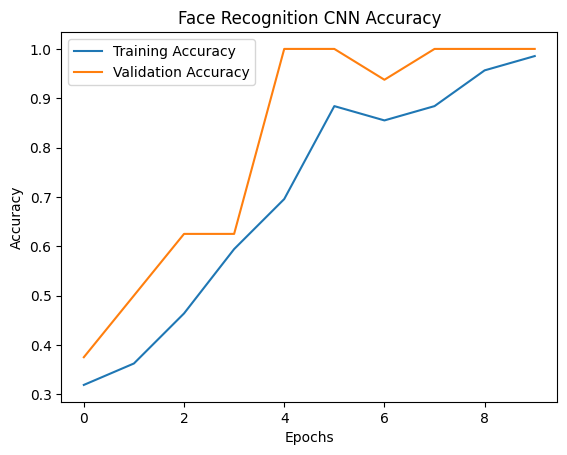

In [8]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Face Recognition CNN Accuracy")
plt.show()

In [14]:
from tensorflow.keras.preprocessing import image

img_path = "/content/drive/MyDrive/FACE23/karthika/Blur (1).png"

img = image.load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
img = image.img_to_array(img) / 255.0
img = np.expand_dims(img, axis=0)

prediction = model.predict(img)
class_index = np.argmax(prediction)

labels = list(train_data.class_indices.keys())
print("Recognized Person:", labels[class_index])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Recognized Person: karthika
